In [48]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
import os 
from time import time
from time import sleep


def api_run():
    global df
    
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '7dd19084-513d-4c99-a9e4-5e8c7ae92e6d',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = df.append(df2)
    
    
    

In [54]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)



In [ ]:
for i in range(333):
    api_run()
    print('API Run completed')
    sleep(60) # == 1 minute
exit()

In [60]:
df3 = df.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.25024,-0.04055,-1.37056,1.45996,-10.95448,-9.39805
Ethereum,0.58508,0.70390,1.86911,2.49009,-19.80955,-8.08209
Tether,0.00072,-0.00850,-0.00867,-0.00311,-0.00043,-0.00818
USD Coin,0.00247,0.00805,0.00284,0.01004,-0.00391,-0.00665
BNB,0.20550,0.09424,-0.14261,-1.19563,-8.70001,6.89710
XRP,0.31712,-1.64122,-4.97346,-11.92064,25.42212,33.04247
Binance USD,0.01858,0.02745,0.01359,0.03333,0.01831,-0.00082
Cardano,0.57035,0.74521,-1.73674,-20.80879,-23.90151,-22.73379
Solana,0.52924,-1.59013,-8.09576,-15.57726,-19.74222,-23.07738


In [125]:
df4['Percent_change'] = df4['Percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])


In [120]:
df4 = df3.stack().to_frame(name='values')
df4 = df4.reset_index()
df4 = df4.rename(columns={'level_1': 'Percent_change'})


In [126]:
df4

,name,Percent_change,values,level_1
0,Bitcoin,1h,0.25024,1h
1,Bitcoin,24h,-0.04055,24h
2,Bitcoin,7d,-1.37056,7d
3,Bitcoin,30d,1.45996,30d
4,Bitcoin,60d,-10.95448,60d
5,Bitcoin,90d,-9.39805,90d
6,Ethereum,1h,0.58508,1h
7,Ethereum,24h,0.70390,24h
8,Ethereum,7d,1.86911,7d
9,Ethereum,30d,2.49009,30d


<Figure size 21600x5760 with 0 Axes>

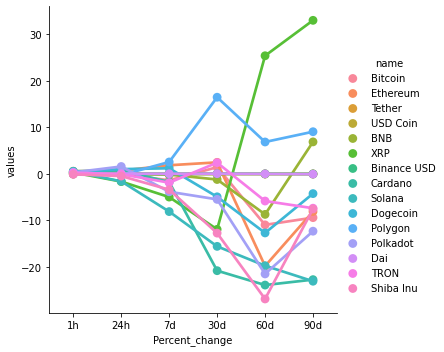

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30,8))

sns.catplot(x='Percent_change', y='values', hue='name', data=df4, kind='point')


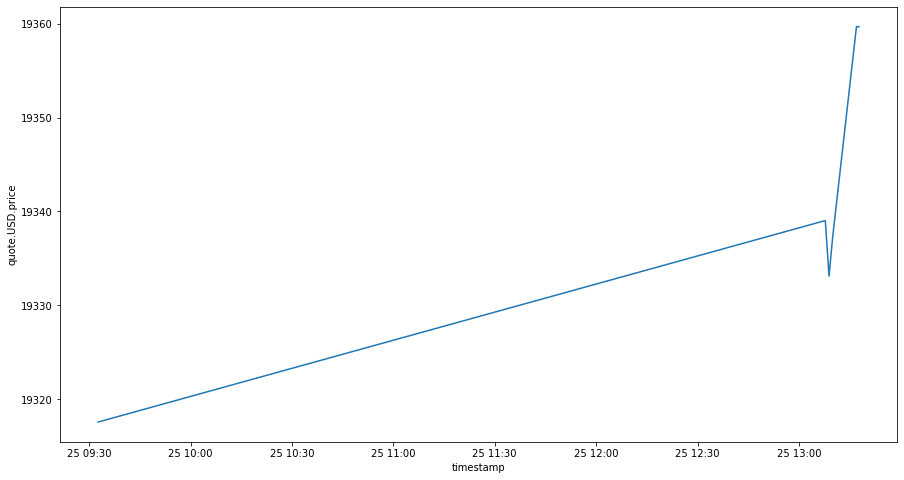

In [129]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")

plt.figure(figsize=(15,8))

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)